# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import string


# Read Data File

In [2]:
df = pd.read_csv('financial_news_data.csv')

In [3]:
df.head()

,sentiment,news_headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df.sentiment.value_counts()

neutral     2878
positive    1362
negative     603
Name: sentiment, dtype: int64

Ada 3 kelas berbeda yang berkaitan dengan sentimen.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment      4843 non-null   object
 1   news_headline  4843 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [6]:
print('Number of missing values per feature')
df.isna().sum()

Number of missing values per feature


sentiment        0
news_headline    0
dtype: int64

In [7]:
print(f"Is there any duplicated rows? \n{df.duplicated().any()}")
print(f"\nHow many? \n{df.duplicated().sum()} rows")

Is there any duplicated rows? 
True

How many? 
6 rows


In [8]:
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,sentiment,news_headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4838,negative,LONDON MarketWatch -- Share prices ended lower...
4839,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4840,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4841,negative,Net sales of the Paper segment decreased to EU...


## Distribution of Classes

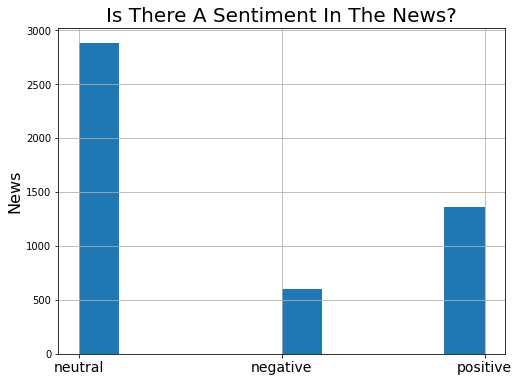

In [9]:
plt.figure(figsize=(8,6))
df.sentiment.hist(xlabelsize=14)
plt.title('Is There A Sentiment In The News?', fontsize=20)
plt.ylabel('News', fontsize=16)
plt.show()

In [10]:
df['tweet_len'] = df.news_headline.apply(len)

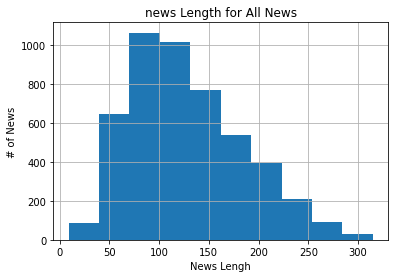

In [11]:
df.tweet_len.hist()
plt.title('news Length for All News')
plt.xlabel('News Lengh')
plt.ylabel('# of News')
plt.show()

In [12]:
import string

## Cleaning

In [13]:
def remove_punct(text):
    text_nopunct = ' '
    text_nopunct = re.sub('['+string.punctuation+']', ' ', text)
    return text_nopunct

df['Text_Clean'] = df['news_headline'].apply(lambda x: remove_punct(x))

In [14]:
# fungsi clean digunakan membersihkan simbol atau frasa yang tidak diperlukan
def cleanNews(news):
    news = news.lower()
    news = re.sub(r'\d+', ' ', news) # remove digits
    news = re.sub(r'\n', ' ', news) # remove enter to 1 space
    news = re.sub(r'\s+', ' ', news)# remove extra spaces
    return news

# mengaplikasikan proses cleaning
df['text_new'] = df.Text_Clean.astype(str).apply(cleanNews)

In [15]:
from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in df.text_new] 

In [16]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens] 

In [17]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [18]:
def remove_stop_words(tokens): 
    return [word for word in tokens if word not in stoplist]

In [19]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens] 

In [20]:
result = [' '.join(sen) for sen in filtered_words] 

In [21]:
df['Text_Final'] = result

In [22]:
df['tokens'] = filtered_words

In [23]:
df

,sentiment,news_headline,tweet_len,Text_Clean,text_new,Text_Final,tokens
0,neutral,"According to Gran , the company has no plans t...",127,According to Gran the company has no plans t...,according to gran the company has no plans to ...,according gran company plans move production r...,"[according, gran, company, plans, move, produc..."
1,neutral,Technopolis plans to develop in stages an area...,190,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,technopolis plans develop stages area less squ...,"[technopolis, plans, develop, stages, area, le..."
2,negative,The international electronic industry company ...,228,The international electronic industry company ...,the international electronic industry company ...,international electronic industry company elco...,"[international, electronic, industry, company,..."
3,positive,With the new production plant the company woul...,206,With the new production plant the company woul...,with the new production plant the company woul...,new production plant company would increase ca...,"[new, production, plant, company, would, incre..."
4,positive,According to the company 's updated strategy f...,203,According to the company s updated strategy f...,according to the company s updated strategy fo...,according company updated strategy years baswa...,"[according, company, updated, strategy, years,..."
...,...,...,...,...,...,...,...
4838,negative,LONDON MarketWatch -- Share prices ended lower...,144,LONDON MarketWatch Share prices ended lower...,london marketwatch share prices ended lower in...,london marketwatch share prices ended lower lo...,"[london, marketwatch, share, prices, ended, lo..."
4839,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,148,Rinkuskiai s beer sales fell by 6 5 per cent ...,rinkuskiai s beer sales fell by per cent to mi...,rinkuskiai beer sales fell per cent million li...,"[rinkuskiai, beer, sales, fell, per, cent, mil..."
4840,negative,Operating profit fell to EUR 35.4 mn from EUR ...,108,Operating profit fell to EUR 35 4 mn from EUR ...,operating profit fell to eur mn from eur mn in...,operating profit fell eur mn eur mn including ...,"[operating, profit, fell, eur, mn, eur, mn, in..."
4841,negative,Net sales of the Paper segment decreased to EU...,226,Net sales of the Paper segment decreased to EU...,net sales of the paper segment decreased to eu...,net sales paper segment decreased eur mn secon...,"[net, sales, paper, segment, decreased, eur, m..."


In [24]:
df = df[['sentiment','Text_Final']]

In [25]:
df

,sentiment,Text_Final
0,neutral,according gran company plans move production r...
1,neutral,technopolis plans develop stages area less squ...
2,negative,international electronic industry company elco...
3,positive,new production plant company would increase ca...
4,positive,according company updated strategy years baswa...
...,...,...
4838,negative,london marketwatch share prices ended lower lo...
4839,neutral,rinkuskiai beer sales fell per cent million li...
4840,negative,operating profit fell eur mn eur mn including ...
4841,negative,net sales paper segment decreased eur mn secon...


In [26]:
# Encode target labels
repl = {'neutral':0,'positive':1,'negative':2}
df['sentiment'].replace(repl, inplace=True)

c:\users\denni\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df["Text_Final"],df["sentiment"], test_size = 0.2, random_state = 42)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [30]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [31]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [32]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(3874, 7776)
(3874, 7776)


In [33]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [34]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(969, 7776)
(969, 7776)


# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train_tfidf,y_train)

LogisticRegression()

In [36]:
predLR=model1.predict(x_test_tfidf)

In [37]:
from sklearn.metrics import confusion_matrix,f1_score
c_m = confusion_matrix(y_test,predLR)
print(c_m)

[[536  23   3]
 [148 138   8]
 [ 50  18  45]]


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predLR)

0.7420020639834881

# Decision Tree 

In [39]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train_tfidf,y_train)

DecisionTreeClassifier()

In [40]:
predDT=model2.predict(x_test_tfidf)

In [41]:
c_m = confusion_matrix(y_test,predDT)
print(c_m)

[[437  88  37]
 [105 158  31]
 [ 44  19  50]]


In [42]:
accuracy_score(y_test,predDT)

0.6656346749226006

# Support Vector Machines

In [43]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(x_train_tfidf,y_train)

SVC()

In [44]:
predSVC=model3.predict(x_test_tfidf)

In [45]:
c_m = confusion_matrix(y_test,predSVC)
print(c_m)

[[542  16   4]
 [176 109   9]
 [ 55  14  44]]


In [46]:
accuracy_score(y_test,predSVC)

0.717234262125903

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=200)
model4.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [48]:
predRF = model4.predict(x_test_tfidf)

In [49]:
from sklearn.metrics import confusion_matrix,f1_score
c_m = confusion_matrix(y_test,predRF)
c_m

array([[537,  20,   5],
       [137, 148,   9],
       [ 45,  17,  51]], dtype=int64)

In [50]:
accuracy_score(y_test,predRF)

0.759545923632611

In [51]:
tp,fn,fp,tn = c_m[0][0],c_m[0][1],c_m[1][0],c_m[1][1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2 * (recall * precision) / (recall + precision)
print("recall = ",recall)
print("precision = ", precision)
print("F1_score = ", f1score)

recall =  0.9640933572710951
precision =  0.7967359050445104
F1_score =  0.8724614134849716


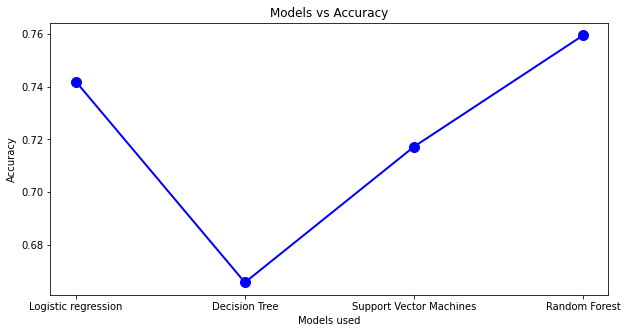

In [52]:
mod_accuracy=[accuracy_score(y_test,predLR),accuracy_score(y_test,predDT),accuracy_score(y_test,predSVC),accuracy_score(y_test,predRF)]
models=["Logistic regression","Decision Tree","Support Vector Machines","Random Forest"]
plt.figure(figsize=(10,5))
plt.plot(models,mod_accuracy,'bo',linestyle='solid',linewidth=2, markersize=10)
plt.xlabel("Models used")
plt.ylabel("Accuracy")
plt.title("Models vs Accuracy")
plt.show()